<a href="https://colab.research.google.com/github/ananyagup/Classification-of-Males-and-Females-in-Textbook-illustrations-/blob/master/The_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pickle
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from sklearn.preprocessing import LabelEncoder
batch_size = 30
num_classes = 2
epochs = 30
input_shape = (150, 150, 3)


Using TensorFlow backend.


In [ ]:
train_labels = []
train_label = []
validation_imgs = []
validation_labels = []

pickle_in = open("mymygenderX_good_onl_un.pickle","rb")
train_img = pickle.load(pickle_in)

pickle_in = open("mymygenderY_good_onl_un.pickle","rb")
y = pickle.load(pickle_in)

for r in range(0, len(y)):
    if y[r] == 1:
        train_label.append("Male")
    elif y[r]== 0 :
        train_label.append("Female")

for w in range(5,20):
    validation_imgs.append(train_img[w])
    validation_labels.append(train_label[w])
for q in range(400,415):
    validation_imgs.append(train_img[q])
    validation_labels.append(train_label[q])

train_imgs= []
    
for w in range(0,5):
    train_imgs.append(train_img[w])
    train_labels.append(train_label[w])
for q in range(21,400):
    train_imgs.append(train_img[q])
    train_labels.append(train_label[q])

for w in range(416,672):
    train_imgs.append(train_img[w])
    train_labels.append(train_label[w])


validation_imgs = np.array(validation_imgs)
train_imgs = np.array(train_imgs)
train_labels = np.array(train_labels)
validation_labels = np.array(validation_labels)

print (len(train_labels))
len (validation_imgs)

train_imgs_scaled = train_imgs.astype('float32')
train_imgs_scaled /= 255

print(train_imgs[0].shape)
print (array_to_img(train_imgs[0]))

validation_imgs_scaled = validation_imgs.astype('float32')
validation_imgs_scaled /= 255

print(validation_imgs[0].shape)
print (array_to_img(validation_imgs[0]))

640
(150, 150, 3)
<PIL.Image.Image image mode=RGB size=150x150 at 0x7F39E6B163C8>
(150, 150, 3)
<PIL.Image.Image image mode=RGB size=150x150 at 0x7F39E6B162E8>


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
print (train_labels[0:5])

for x in range(0, len(train_labels)):
    if train_labels[x]== "Male":
        train_labels[x] = "Female"
    else :
        train_labels[x] = "Male"
print (train_labels[0:5])

print (validation_labels[0:5])
for x in range(0, len(validation_labels)):
    if validation_labels[x]== "Male":
        validation_labels[x] = "Female"
    else :
        validation_labels[x] = "Male"
print (validation_labels[0:5])

['Female' 'Female' 'Female' 'Female' 'Female']
['Male' 'Male' 'Male' 'Male' 'Male']
['Female' 'Female' 'Female' 'Female' 'Female']
['Male' 'Male' 'Male' 'Male' 'Male']


Labels: ['Male', 'Male', 'Male', 'Male', 'Male']


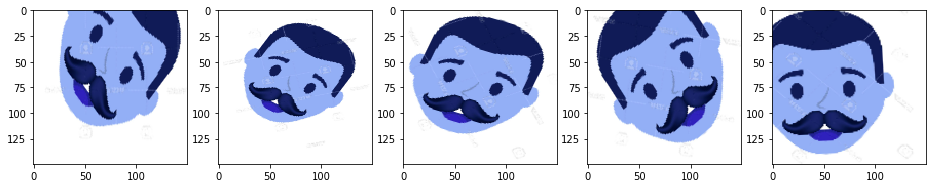

In [ ]:
img_id = 35


cat_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
cat = [next(cat_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
print('Labels:', [item[1][0] for item in cat])
l = [ax[i].imshow(cat[i][0][0]) for i in range(0,5)]

Labels: ['Female', 'Female', 'Female', 'Female', 'Female']


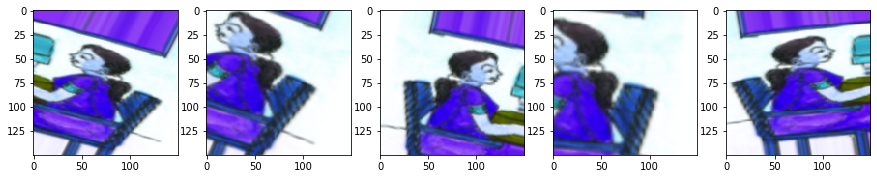

In [ ]:
img_id = 600
dog_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
dog = [next(dog_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(15, 6))
print('Labels:', [item[1][0] for item in dog])
l = [ax[i].imshow(dog[i][0][0]) for i in range(0,5)]

In [ ]:
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)
input_shape = (150, 150, 3)

'''from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])
              
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1) '''             

"from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout\nfrom keras.models import Sequential\nfrom keras import optimizers\n\nmodel = Sequential()\n\nmodel.add(Conv2D(16, kernel_size=(3, 3), activation='relu', \n                 input_shape=input_shape))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\n\nmodel.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\n\nmodel.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\n\nmodel.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\n\nmodel.add(Flatten())\nmodel.add(Dense(512, activation='relu'))\nmodel.add(Dropout(0.3))\nmodel.add(Dense(512, activation='relu'))\nmodel.add(Dropout(0.3))\nmodel.add(Dense(1, activation='sigmoid'))\n\nmodel.compile(loss='binary_crossentropy',\n              optimizer=optimizers.RMSprop(lr=1e-4),\n              metrics=['accuracy'])\n              \nhistory =

In [ ]:
from tensorflow.python.keras.applications import vgg16
from  tensorflow.python.keras.models import Model
import keras
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras import optimizers


vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = vgg.layers[-1].output
output = Flatten()(output)
vgg_model = Model(vgg.input, output)

vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False
    
import pandas as pd
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])    



Instructions for updating:
If using Keras pass *_constraint arguments to layers.
58892288/58889256 [==============================] - 3s 0us/step


,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f39de8dfb70>,input_1,False
1,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f39de886160>,block1_conv1,False
2,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f39de87bc50>,block1_conv2,False
3,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f39de874940>,block1_pool,False
4,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f39de8748d0>,block2_conv1,False
5,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f39ddfea048>,block2_conv2,False
6,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f39ddff35c0>,block2_pool,False
7,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f39ddff35f8>,block3_conv1,False
8,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f39de007128>,block3_conv2,False
9,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f39ddf93780>,block3_conv3,False


(1, 4, 4, 512)


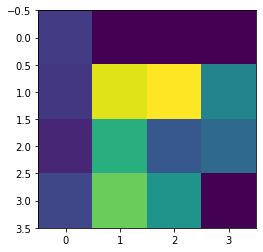

In [ ]:
bottleneck_feature_example = vgg.predict(train_imgs_scaled[0:1])
print(bottleneck_feature_example.shape)
plt.imshow(bottleneck_feature_example[0][:,:,0])

In [ ]:
def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features
    
train_features_vgg = get_bottleneck_features(vgg_model, train_imgs_scaled)
validation_features_vgg = get_bottleneck_features(vgg_model, validation_imgs_scaled)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', validation_features_vgg.shape)

Train Bottleneck Features: (640, 8192) 	Validation Bottleneck Features: (30, 8192)


In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

input_shape = vgg_model.output_shape[1]

model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 4,457,985
Trainable par

In [ ]:
history = model.fit(x=train_features_vgg, y=train_labels_enc,
                    validation_data=(validation_features_vgg, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)




Train on 640 samples, validate on 30 samples
Epoch 1/30





640/640 [==============================] - 1s 820us/step - loss: 0.7197 - acc: 0.5344 - val_loss: 0.6525 - val_acc: 0.5667
Epoch 2/30
640/640 [==============================] - 0s 160us/step - loss: 0.6182 - acc: 0.6531 - val_loss: 0.6320 - val_acc: 0.5667
Epoch 3/30
640/640 [==============================] - 0s 186us/step - loss: 0.5445 - acc: 0.7125 - val_loss: 0.5863 - val_acc: 0.7000
Epoch 4/30
640/640 [==============================] - 0s 155us/step - loss: 0.4704 - acc: 0.7766 - val_loss: 0.6204 - val_acc: 0.6333
Epoch 5/30
640/640 [==============================] - 0s 157us/step - loss: 0.4076 - acc: 0.8391 - val_loss: 0.6505 - val_acc: 0.6667
Epoch 6/30
640/640 [==============================] - 0s 172us/step - loss: 0.3295 - acc: 0.8719 - val_loss: 0.5724 - val_acc: 0.5667
Epoch 7/30
640/640 [==============================] - 0s 162us/step - loss: 0.2965 - acc: 0.8875 - val_loss: 0.5791 - val_acc: 0.7667
Epoch 8/3

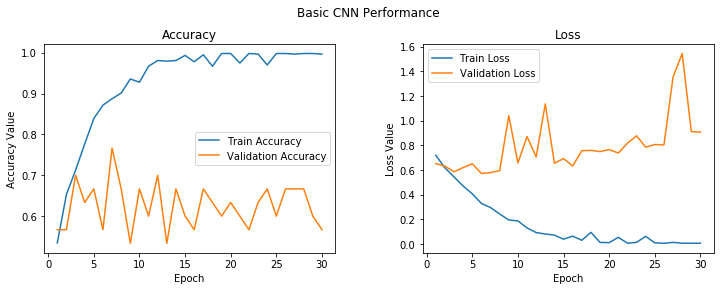

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

In [ ]:
'''from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
              
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1)    
'''  

"from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer\nfrom keras.models import Sequential\nfrom keras import optimizers\n\nmodel = Sequential()\nmodel.add(vgg_model)\nmodel.add(Dense(512, activation='relu', input_dim=input_shape))\nmodel.add(Dropout(0.3))\nmodel.add(Dense(512, activation='relu'))\nmodel.add(Dropout(0.3))\nmodel.add(Dense(1, activation='sigmoid'))\n\nmodel.compile(loss='binary_crossentropy',\n              optimizer=optimizers.RMSprop(lr=2e-5),\n              metrics=['accuracy'])\n              \nhistory = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,\n                              validation_data=val_generator, validation_steps=50, \n                              verbose=1)    \n"

In [ ]:
vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])   

,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f39de8dfb70>,input_1,False
1,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f39de886160>,block1_conv1,False
2,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f39de87bc50>,block1_conv2,False
3,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f39de874940>,block1_pool,False
4,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f39de8748d0>,block2_conv1,False
5,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f39ddfea048>,block2_conv2,False
6,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f39ddff35c0>,block2_pool,False
7,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f39ddff35f8>,block3_conv1,False
8,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f39de007128>,block3_conv2,False
9,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f39ddf93780>,block3_conv3,False


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')
val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras import optimizers

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy'])
              
              

In [ ]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=10,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1)

Epoch 1/10
100/100 [==============================] - 17s 173ms/step - loss: 0.0048 - acc: 0.9979 - val_loss: 2.2016 - val_acc: 0.8000
Epoch 2/10
100/100 [==============================] - 17s 167ms/step - loss: 0.0078 - acc: 0.9972 - val_loss: 1.9405 - val_acc: 0.8000
Epoch 3/10
100/100 [==============================] - 16s 158ms/step - loss: 0.0107 - acc: 0.9962 - val_loss: 1.6954 - val_acc: 0.8333
Epoch 4/10
100/100 [==============================] - 17s 170ms/step - loss: 0.0219 - acc: 0.9952 - val_loss: 1.4109 - val_acc: 0.8333
Epoch 5/10
100/100 [==============================] - 16s 162ms/step - loss: 0.0158 - acc: 0.9979 - val_loss: 1.1636 - val_acc: 0.9000
Epoch 6/10
 51/100 [==============>...............] - ETA: 6s - loss: 0.0106 - acc: 0.9953

KeyboardInterrupt: ignored

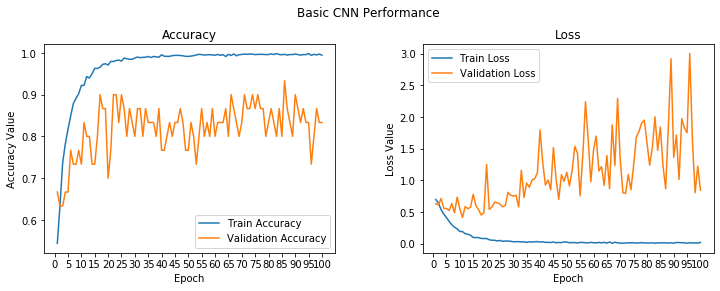

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model.save('model_final_cnn.h5')

In [ ]:
from tensorflow.keras.models import load_model

pred = load_model('model_final_cnn.h5')

In [ ]:
import cv2
def prepare(filepath):
    IMG_SIZE = 150  # 50 in txt-based
    img_array = cv2.imread(filepath)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3) 



In [ ]:
pred.predict(prepare('/content/IMG_0308.JPG'))

array([[1.]], dtype=float32)